In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns

from sklearn import cluster 
from sklearn.preprocessing import StandardScaler
from sklearn import metrics
from sklearn.metrics import silhouette_score

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans
# to suppress warningss
from warnings import filterwarnings
filterwarnings('ignore')

#read data
data = pd.read_csv('CC GENERAL.csv')
data.head()

CUST_ID      BALANCE  BALANCE_FREQUENCY  PURCHASES  ONEOFF_PURCHASES  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   INSTALLMENTS_PURCHASES  CASH_ADVANCE  PURCHASES_FREQUENCY  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   ONEOFF_PURCHASES_FREQUENCY  PURCHASES_INSTALLMENTS_FREQUENCY  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   CASH_ADVANCE_FREQUENCY  CASH_ADVANCE_TRX  PURCHASES_TRX  CREDIT_LIMIT  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      PAYMENTS  MINIMUM_PAYMENTS  PRC_FULL_PAYMENT  TENURE  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000               NaN          0.000000      12  
4   678.334763        244.791237          0.000000      12

In [2]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

In [3]:
#convert column names to lower case for easy interpretation
data.columns = data.columns.str.lower()

In [4]:
data.columns

Index(['cust_id', 'balance', 'balance_frequency', 'purchases',
       'oneoff_purchases', 'installments_purchases', 'cash_advance',
       'purchases_frequency', 'oneoff_purchases_frequency',
       'purchases_installments_frequency', 'cash_advance_frequency',
       'cash_advance_trx', 'purchases_trx', 'credit_limit', 'payments',
       'minimum_payments', 'prc_full_payment', 'tenure'],
      dtype='object')

In [5]:
#description de données
data.describe()

balance  balance_frequency     purchases  oneoff_purchases  \
count   8950.000000        8950.000000   8950.000000       8950.000000   
mean    1564.474828           0.877271   1003.204834        592.437371   
std     2081.531879           0.236904   2136.634782       1659.887917   
min        0.000000           0.000000      0.000000          0.000000   
25%      128.281915           0.888889     39.635000          0.000000   
50%      873.385231           1.000000    361.280000         38.000000   
75%     2054.140036           1.000000   1110.130000        577.405000   
max    19043.138560           1.000000  49039.570000      40761.250000   

       installments_purchases  cash_advance  purchases_frequency  \
count             8950.000000   8950.000000          8950.000000   
mean               411.067645    978.871112             0.490351   
std                904.338115   2097.163877             0.401371   
min                  0.000000      0.000000             0.000000   
25%                  0.000000      0.000000             0.083333   
50%                 89.000000      0.000000             0.500000   
75%                468.637500   1113.821139             0.916667   
max              22500.000000  47137.211760             1.000000   

       oneoff_purchases_frequency  purchases_installments_frequency  \
count                 8950.000000                       8950.000000   
mean                     0.202458                          0.364437   
std                      0.298336                          0.397448   
min                      0.000000                          0.000000   
25%                      0.000000                          0.000000   
50%                      0.083333                          0.166667   
75%                      0.300000                          0.750000   
max                      1.000000                          1.000000   

       cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
count             8950.000000       8950.000000    8950.000000   8949.000000   
mean                 0.135144          3.248827      14.709832   4494.449450   
std                  0.200121          6.824647      24.857649   3638.815725   
min                  0.000000          0.000000       0.000000     50.000000   
25%                  0.000000          0.000000       1.000000   1600.000000   
50%                  0.000000          0.000000       7.000000   3000.000000   
75%                  0.222222          4.000000      17.000000   6500.000000   
max                  1.500000        123.000000     358.000000  30000.000000   

           payments  minimum_payments  prc_full_payment       tenure  
count   8950.000000       8637.000000       8950.000000  8950.000000  
mean    1733.143852        864.206542          0.153715    11.517318  
std     2895.063757       2372.446607          0.292499     1.338331  
min        0.000000          0.019163          0.000000     6.000000  
25%      383.276166        169.123707          0.000000    12.000000  
50%      856.901546        312.343947          0.000000    12.000000  
75%     1901.134317        825.485459          0.142857    12.000000  
max    50721.483360      76406.207520          1.000000    12.000000

In [5]:
#découvrir les missing valeus
data.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [6]:
# fillna les missing values

data['credit_limit'].fillna(data['credit_limit'].median(), inplace=True)
data['minimum_payments'].fillna(data['minimum_payments'].median(), inplace=True)

In [7]:
#découvrir les missing valeus
data.isnull().sum().sum()

0

In [10]:
data.head()

cust_id      balance  balance_frequency  purchases  oneoff_purchases  \
0  C10001    40.900749           0.818182      95.40              0.00   
1  C10002  3202.467416           0.909091       0.00              0.00   
2  C10003  2495.148862           1.000000     773.17            773.17   
3  C10004  1666.670542           0.636364    1499.00           1499.00   
4  C10005   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  
0   201.802084        139.509787          0.000000      12  
1  4103.032597       1072.340217          0.222222      12  
2   622.066742        627.284787          0.000000      12  
3     0.000000        312.343947          0.000000      12  
4   678.334763        244.791237          0.000000      12

<Axes: >

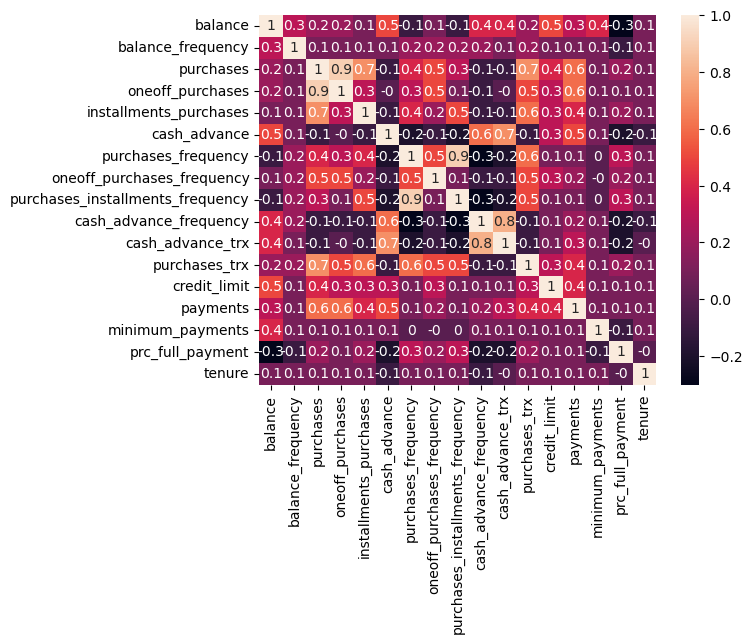

In [8]:
#etude de la correlation
matrice_corr = data.corr().round(1)
sns.heatmap(data=matrice_corr, annot=True)

In [42]:
#Balance has a higher level of correlation with Cash Advance, Cash Advance Frequency and Credit Limit.
#Payments variable has a high correletion with Purchases and one off Purchases.
#Tenure has a negative correlation with Cash Advance and Cash Advance Frequency variables.

In [9]:
#suprissions des colonnes que n'allons pas besoin
data.drop(columns = ['cust_id'], inplace = True)

In [10]:
data.shape

(8950, 17)

In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8950 entries, 0 to 8949
Data columns (total 17 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   balance                           8950 non-null   float64
 1   balance_frequency                 8950 non-null   float64
 2   purchases                         8950 non-null   float64
 3   oneoff_purchases                  8950 non-null   float64
 4   installments_purchases            8950 non-null   float64
 5   cash_advance                      8950 non-null   float64
 6   purchases_frequency               8950 non-null   float64
 7   oneoff_purchases_frequency        8950 non-null   float64
 8   purchases_installments_frequency  8950 non-null   float64
 9   cash_advance_frequency            8950 non-null   float64
 10  cash_advance_trx                  8950 non-null   int64  
 11  purchases_trx                     8950 non-null   int64  
 12  credit

In [15]:
data.dtypes

balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

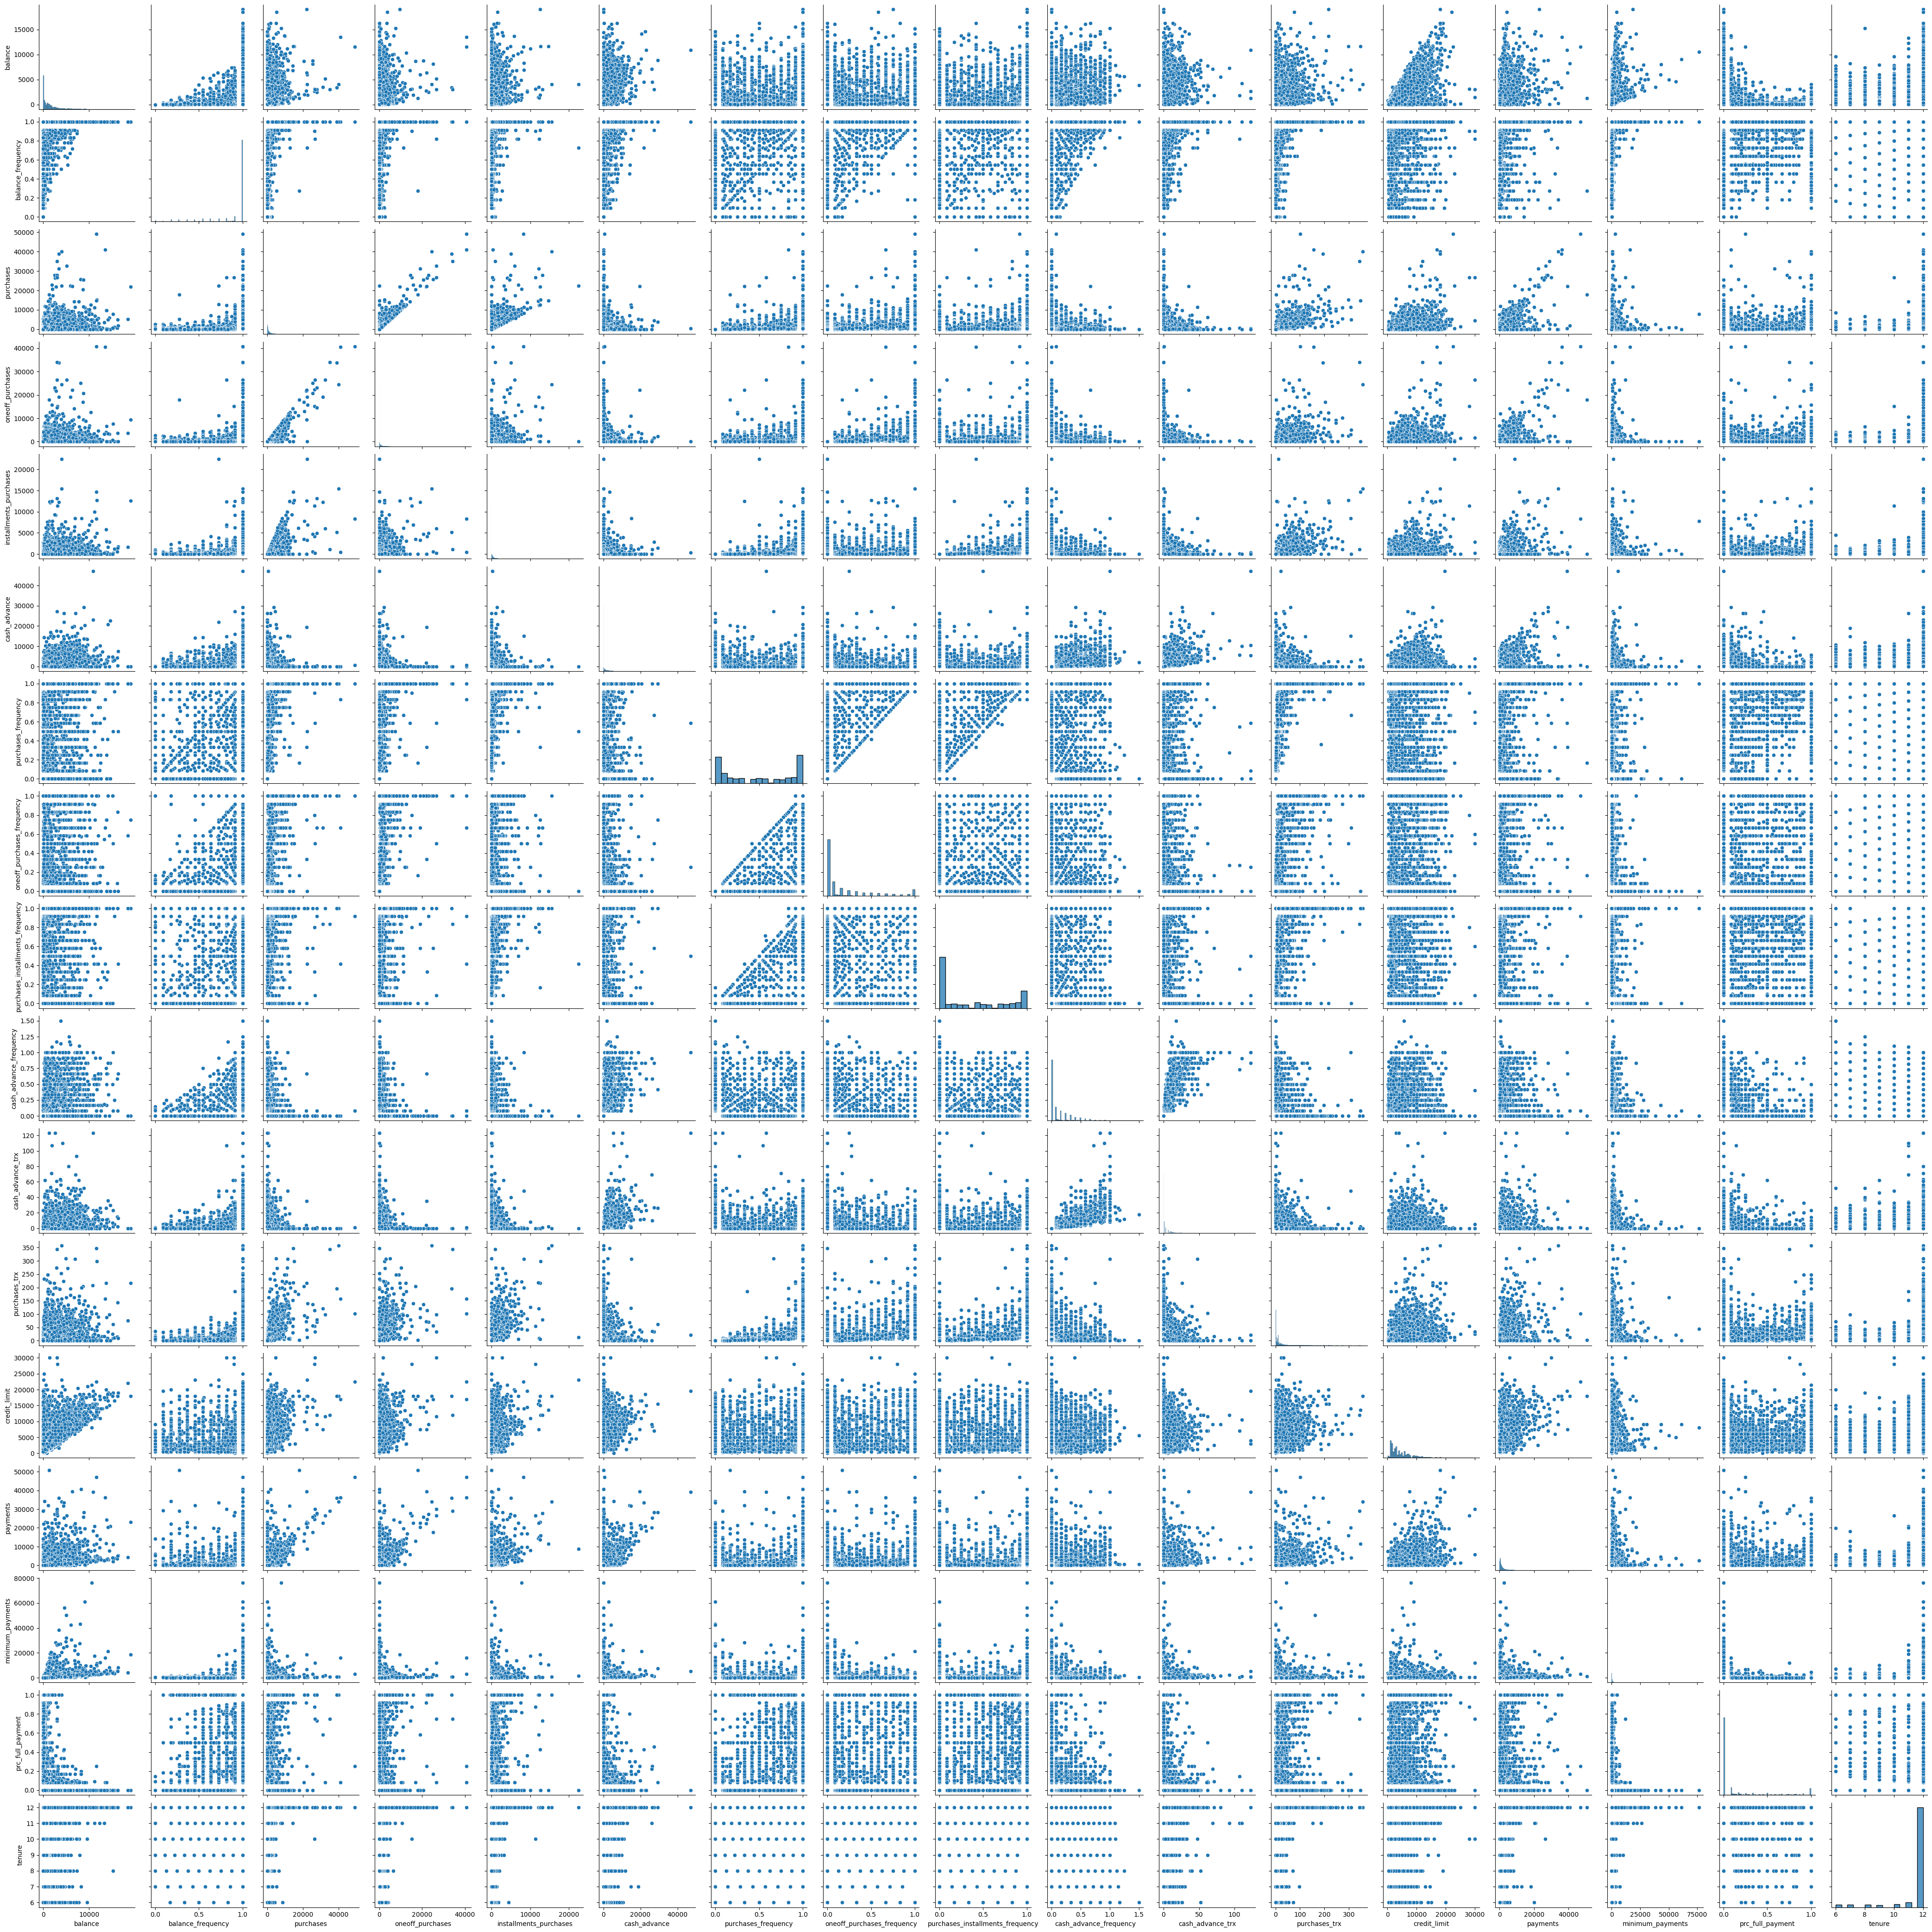

In [15]:
# Plotting Pair Plot 
sns.pairplot(data)
plt.show()

In [12]:
## Create important derived variables

def month_avg_purchase(prch, tenure):
    return prch/tenure

def month_cash_advance(cash, tenure):
    return cash/tenure

def monthly_usage(blnc, limit):
    return blnc/limit

def prch_type(x, y):
    if ((x <= 0) & (y <= 0)):
        return 'none'
    elif((x > 0) & (y <= 0)):
        return 'one_off'
    elif((x <= 0) & (y > 0)):
        return 'installments'
    elif((x > 0) & (y > 0)):
        return 'both'
        

In [18]:
# Both the Purchases

# Installment Purchases

# None Of the Purchases
# One Of Purchase

In [13]:
data['monthly_avg_purchase'] = data.apply(lambda x : month_avg_purchase(x['purchases'], x['tenure']), axis = 1)
data['monthly_cash_advance'] = data.apply(lambda x : month_cash_advance(x['cash_advance'], x['tenure']), axis = 1)
data['monthly_usage'] = data.apply(lambda x : monthly_usage(x['balance'], x['credit_limit']), axis = 1)
data['purchase_type'] = data.apply(lambda x : prch_type(x['oneoff_purchases'], x['installments_purchases']), axis = 1)

In [14]:
data.head()

balance  balance_frequency  purchases  oneoff_purchases  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  ...  purchases_trx  credit_limit     payments  \
0                0.000000  ...              2        1000.0   201.802084   
1                0.250000  ...              0        7000.0  4103.032597   
2                0.000000  ...             12        7500.0   622.066742   
3                0.083333  ...              1        7500.0     0.000000   
4                0.000000  ...              1        1200.0   678.334763   

   minimum_payments  prc_full_payment  tenure  monthly_avg_purchase  \
0        139.509787          0.000000      12              7.950000   
1       1072.340217          0.222222      12              0.000000   
2        627.284787          0.000000      12             64.430833   
3        312.343947          0.000000      12            124.916667   
4        244.791237          0.000000      12              1.333333   

   monthly_cash_advance  monthly_usage  purchase_type  
0              0.000000       0.040901   installments  
1            536.912124       0.457495           none  
2              0.000000       0.332687        one_off  
3             17.149001       0.222223        one_off  
4              0.000000       0.681429        one_off  

[5 rows x 21 columns]

In [21]:
# Purchase Type Categories are as follows:
data['purchase_type'] .value_counts()

both            2774
installments    2260
none            2042
one_off         1874
Name: purchase_type, dtype: int64

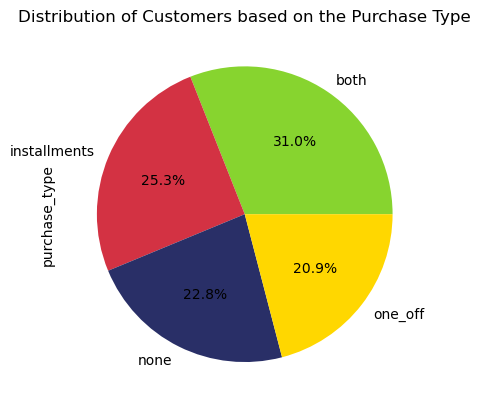

In [15]:
# Plotting the distribution of customer on basis of Purhcase Type
data['purchase_type'].value_counts().sort_index().plot(kind='pie',autopct='%1.01f%%', 
                     colors =['#87d42f','#d33243','#292f67','#FFD700'],fontsize=10,textprops = {'fontsize': 18})
plt.title('Distribution of Customers based on the Purchase Type')
plt.show()


In [ ]:
# Inference:
# There are 31% of the customers who make purchases for both the types: One Off and Installment Purchases followed by 25.3% customer who make only installment purchases.

In [16]:
# Creating dummy variables for Purchase_Type 

x_cat = pd.get_dummies(data['purchase_type'], drop_first=True)
x_cat

# using drop_first = True as will create one dimension less and the 4th category can be computed using the first 3 categorie

installments  none  one_off
0                1     0        0
1                0     1        0
2                0     0        1
3                0     0        1
4                0     0        1
...            ...   ...      ...
8945             1     0        0
8946             1     0        0
8947             1     0        0
8948             0     1        0
8949             0     0        1

[8950 rows x 3 columns]

In [17]:
# Filtering out the Numerical variables:

x_num = data.dtypes[data.dtypes != 'object'].index.to_list()
x_num

['balance',
 'balance_frequency',
 'purchases',
 'oneoff_purchases',
 'installments_purchases',
 'cash_advance',
 'purchases_frequency',
 'oneoff_purchases_frequency',
 'purchases_installments_frequency',
 'cash_advance_frequency',
 'cash_advance_trx',
 'purchases_trx',
 'credit_limit',
 'payments',
 'minimum_payments',
 'prc_full_payment',
 'tenure',
 'monthly_avg_purchase',
 'monthly_cash_advance',
 'monthly_usage']

In [18]:
# Original Variables Concatenated with dummy variables but without Scaling the Numerical variables :
num_data=data[x_num]
original_data = pd.concat([x_cat, data[x_num]], axis=1)
original_data.head()


installments  none  one_off      balance  balance_frequency  purchases  \
0             1     0        0    40.900749           0.818182      95.40   
1             0     1        0  3202.467416           0.909091       0.00   
2             0     0        1  2495.148862           1.000000     773.17   
3             0     0        1  1666.670542           0.636364    1499.00   
4             0     0        1   817.714335           1.000000      16.00   

   oneoff_purchases  installments_purchases  cash_advance  \
0              0.00                    95.4      0.000000   
1              0.00                     0.0   6442.945483   
2            773.17                     0.0      0.000000   
3           1499.00                     0.0    205.788017   
4             16.00                     0.0      0.000000   

   purchases_frequency  ...  cash_advance_trx  purchases_trx  credit_limit  \
0             0.166667  ...                 0              2        1000.0   
1             0.000000  ...                 4              0        7000.0   
2             1.000000  ...                 0             12        7500.0   
3             0.083333  ...                 1              1        7500.0   
4             0.083333  ...                 0              1        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  \
0   201.802084        139.509787          0.000000      12   
1  4103.032597       1072.340217          0.222222      12   
2   622.066742        627.284787          0.000000      12   
3     0.000000        312.343947          0.000000      12   
4   678.334763        244.791237          0.000000      12   

   monthly_avg_purchase  monthly_cash_advance  monthly_usage  
0              7.950000              0.000000       0.040901  
1              0.000000            536.912124       0.457495  
2             64.430833              0.000000       0.332687  
3            124.916667             17.149001       0.222223  
4              1.333333              0.000000       0.681429  

[5 rows x 23 columns]

In [19]:
num_data.head()

balance  balance_frequency  purchases  oneoff_purchases  \
0    40.900749           0.818182      95.40              0.00   
1  3202.467416           0.909091       0.00              0.00   
2  2495.148862           1.000000     773.17            773.17   
3  1666.670542           0.636364    1499.00           1499.00   
4   817.714335           1.000000      16.00             16.00   

   installments_purchases  cash_advance  purchases_frequency  \
0                    95.4      0.000000             0.166667   
1                     0.0   6442.945483             0.000000   
2                     0.0      0.000000             1.000000   
3                     0.0    205.788017             0.083333   
4                     0.0      0.000000             0.083333   

   oneoff_purchases_frequency  purchases_installments_frequency  \
0                    0.000000                          0.083333   
1                    0.000000                          0.000000   
2                    1.000000                          0.000000   
3                    0.083333                          0.000000   
4                    0.083333                          0.000000   

   cash_advance_frequency  cash_advance_trx  purchases_trx  credit_limit  \
0                0.000000                 0              2        1000.0   
1                0.250000                 4              0        7000.0   
2                0.000000                 0             12        7500.0   
3                0.083333                 1              1        7500.0   
4                0.000000                 0              1        1200.0   

      payments  minimum_payments  prc_full_payment  tenure  \
0   201.802084        139.509787          0.000000      12   
1  4103.032597       1072.340217          0.222222      12   
2   622.066742        627.284787          0.000000      12   
3     0.000000        312.343947          0.000000      12   
4   678.334763        244.791237          0.000000      12   

   monthly_avg_purchase  monthly_cash_advance  monthly_usage  
0              7.950000              0.000000       0.040901  
1              0.000000            536.912124       0.457495  
2             64.430833              0.000000       0.332687  
3            124.916667             17.149001       0.222223  
4              1.333333              0.000000       0.681429

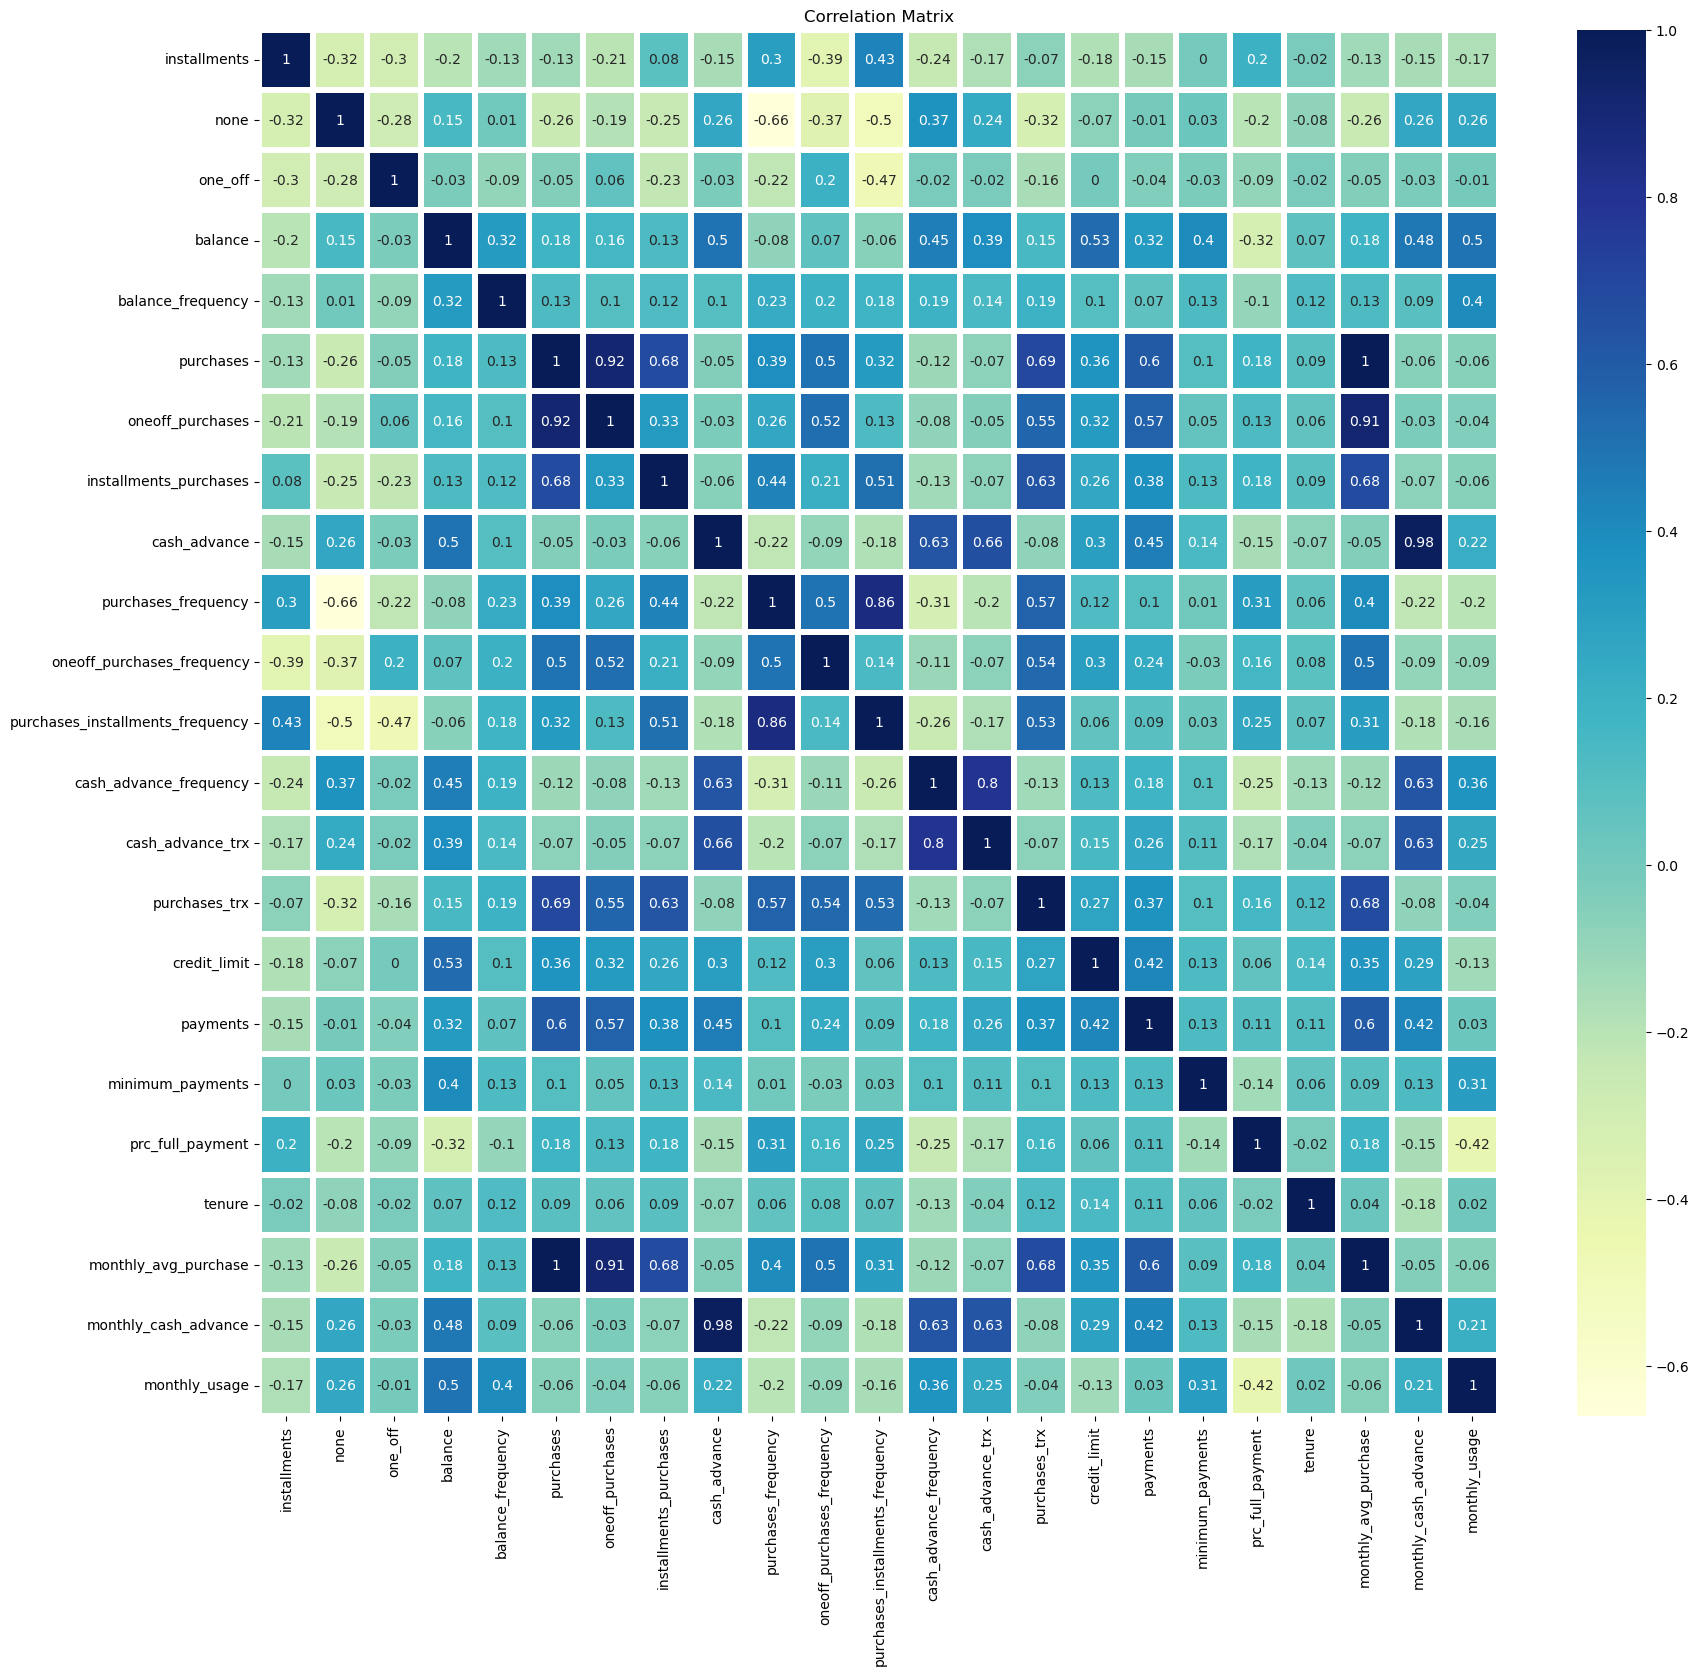

In [20]:
### finding Correlation among the variables:

plt.figure(figsize=(20,18))
sns.heatmap(round(original_data.corr(),2),annot=True, cmap='YlGnBu', linewidths=3, fmt='.2g')
plt.title('Correlation Matrix')
plt.show()

In [ ]:
# purchases with one off & monthly_avg_purchase
# one-off with monthly_avg_purchase
# cahs_adv wth monthly_cash advance
# We can drop purchases column and cash_adv based on our finding from correlation matrix

In [21]:
#prescreening of variables to remove less useful vraiable for segmentation
data_feature = num_data.drop(columns=['purchases', 'cash_advance'], axis = 1)
data_feature.head()

balance  balance_frequency  oneoff_purchases  installments_purchases  \
0    40.900749           0.818182              0.00                    95.4   
1  3202.467416           0.909091              0.00                     0.0   
2  2495.148862           1.000000            773.17                     0.0   
3  1666.670542           0.636364           1499.00                     0.0   
4   817.714335           1.000000             16.00                     0.0   

   purchases_frequency  oneoff_purchases_frequency  \
0             0.166667                    0.000000   
1             0.000000                    0.000000   
2             1.000000                    1.000000   
3             0.083333                    0.083333   
4             0.083333                    0.083333   

   purchases_installments_frequency  cash_advance_frequency  cash_advance_trx  \
0                          0.083333                0.000000                 0   
1                          0.000000                0.250000                 4   
2                          0.000000                0.000000                 0   
3                          0.000000                0.083333                 1   
4                          0.000000                0.000000                 0   

   purchases_trx  credit_limit     payments  minimum_payments  \
0              2        1000.0   201.802084        139.509787   
1              0        7000.0  4103.032597       1072.340217   
2             12        7500.0   622.066742        627.284787   
3              1        7500.0     0.000000        312.343947   
4              1        1200.0   678.334763        244.791237   

   prc_full_payment  tenure  monthly_avg_purchase  monthly_cash_advance  \
0          0.000000      12              7.950000              0.000000   
1          0.222222      12              0.000000            536.912124   
2          0.000000      12             64.430833              0.000000   
3          0.000000      12            124.916667             17.149001   
4          0.000000      12              1.333333              0.000000   

   monthly_usage  
0       0.040901  
1       0.457495  
2       0.332687  
3       0.222223  
4       0.681429

In [22]:
x_num1 = data_feature.dtypes[num_data.dtypes != 'object'].index.to_list()
x_num1

['balance',
 'balance_frequency',
 'oneoff_purchases',
 'installments_purchases',
 'purchases_frequency',
 'oneoff_purchases_frequency',
 'purchases_installments_frequency',
 'cash_advance_frequency',
 'cash_advance_trx',
 'purchases_trx',
 'credit_limit',
 'payments',
 'minimum_payments',
 'prc_full_payment',
 'tenure',
 'monthly_avg_purchase',
 'monthly_cash_advance',
 'monthly_usage']

In [23]:
# Scale and plot the features using the Standard scaler (Normalization)
Scaler = StandardScaler()
d_std = pd.DataFrame(Scaler.fit_transform(data_feature[x_num1]), columns=x_num1)
d_std.head()

balance  balance_frequency  oneoff_purchases  installments_purchases  \
0 -0.731989          -0.249434         -0.356934               -0.349079   
1  0.786961           0.134325         -0.356934               -0.454576   
2  0.447135           0.518084          0.108889               -0.454576   
3  0.049099          -1.016953          0.546189               -0.454576   
4 -0.358775           0.518084         -0.347294               -0.454576   

   purchases_frequency  oneoff_purchases_frequency  \
0            -0.806490                   -0.678661   
1            -1.221758                   -0.678661   
2             1.269843                    2.673451   
3            -1.014125                   -0.399319   
4            -1.014125                   -0.399319   

   purchases_installments_frequency  cash_advance_frequency  cash_advance_trx  \
0                         -0.707313               -0.675349         -0.476070   
1                         -0.916995                0.573963          0.110074   
2                         -0.916995               -0.675349         -0.476070   
3                         -0.916995               -0.258913         -0.329534   
4                         -0.916995               -0.675349         -0.476070   

   purchases_trx  credit_limit  payments  minimum_payments  prc_full_payment  \
0      -0.511333     -0.960378 -0.528979         -0.302400         -0.525551   
1      -0.591796      0.688678  0.818642          0.097500          0.234227   
2      -0.109020      0.826100 -0.383805         -0.093293         -0.525551   
3      -0.551565      0.826100 -0.598688         -0.228307         -0.525551   
4      -0.551565     -0.905410 -0.364368         -0.257266         -0.525551   

    tenure  monthly_avg_purchase  monthly_cash_advance  monthly_usage  
0  0.36068             -0.433384             -0.460727      -0.892951  
1  0.36068             -0.477428              2.319396       0.176063  
2  0.36068             -0.120468             -0.460727      -0.144206  
3  0.36068              0.214636             -0.371929      -0.427665  
4  0.36068             -0.470041             -0.460727       0.750693

In [24]:
# Combining the Categorical and Numerical dataset

final_df = pd.concat([x_cat, d_std], axis=1)
final_df.head()


installments  none  one_off   balance  balance_frequency  oneoff_purchases  \
0             1     0        0 -0.731989          -0.249434         -0.356934   
1             0     1        0  0.786961           0.134325         -0.356934   
2             0     0        1  0.447135           0.518084          0.108889   
3             0     0        1  0.049099          -1.016953          0.546189   
4             0     0        1 -0.358775           0.518084         -0.347294   

   installments_purchases  purchases_frequency  oneoff_purchases_frequency  \
0               -0.349079            -0.806490                   -0.678661   
1               -0.454576            -1.221758                   -0.678661   
2               -0.454576             1.269843                    2.673451   
3               -0.454576            -1.014125                   -0.399319   
4               -0.454576            -1.014125                   -0.399319   

   purchases_installments_frequency  ...  cash_advance_trx  purchases_trx  \
0                         -0.707313  ...         -0.476070      -0.511333   
1                         -0.916995  ...          0.110074      -0.591796   
2                         -0.916995  ...         -0.476070      -0.109020   
3                         -0.916995  ...         -0.329534      -0.551565   
4                         -0.916995  ...         -0.476070      -0.551565   

   credit_limit  payments  minimum_payments  prc_full_payment   tenure  \
0     -0.960378 -0.528979         -0.302400         -0.525551  0.36068   
1      0.688678  0.818642          0.097500          0.234227  0.36068   
2      0.826100 -0.383805         -0.093293         -0.525551  0.36068   
3      0.826100 -0.598688         -0.228307         -0.525551  0.36068   
4     -0.905410 -0.364368         -0.257266         -0.525551  0.36068   

   monthly_avg_purchase  monthly_cash_advance  monthly_usage  
0             -0.433384             -0.460727      -0.892951  
1             -0.477428              2.319396       0.176063  
2             -0.120468             -0.460727      -0.144206  
3              0.214636             -0.371929      -0.427665  
4             -0.470041             -0.460727       0.750693  

[5 rows x 21 columns]

In [107]:
                                #Applying PCA
# Will be performing Prinicipal Component Analysis(PCA) to reduce the dimensions.


In [26]:
from sklearn.decomposition import PCA

final_df.head()


installments  none  one_off   balance  balance_frequency  oneoff_purchases  \
0             1     0        0 -0.731989          -0.249434         -0.356934   
1             0     1        0  0.786961           0.134325         -0.356934   
2             0     0        1  0.447135           0.518084          0.108889   
3             0     0        1  0.049099          -1.016953          0.546189   
4             0     0        1 -0.358775           0.518084         -0.347294   

   installments_purchases  purchases_frequency  oneoff_purchases_frequency  \
0               -0.349079            -0.806490                   -0.678661   
1               -0.454576            -1.221758                   -0.678661   
2               -0.454576             1.269843                    2.673451   
3               -0.454576            -1.014125                   -0.399319   
4               -0.454576            -1.014125                   -0.399319   

   purchases_installments_frequency  ...  cash_advance_trx  purchases_trx  \
0                         -0.707313  ...         -0.476070      -0.511333   
1                         -0.916995  ...          0.110074      -0.591796   
2                         -0.916995  ...         -0.476070      -0.109020   
3                         -0.916995  ...         -0.329534      -0.551565   
4                         -0.916995  ...         -0.476070      -0.551565   

   credit_limit  payments  minimum_payments  prc_full_payment   tenure  \
0     -0.960378 -0.528979         -0.302400         -0.525551  0.36068   
1      0.688678  0.818642          0.097500          0.234227  0.36068   
2      0.826100 -0.383805         -0.093293         -0.525551  0.36068   
3      0.826100 -0.598688         -0.228307         -0.525551  0.36068   
4     -0.905410 -0.364368         -0.257266         -0.525551  0.36068   

   monthly_avg_purchase  monthly_cash_advance  monthly_usage  
0             -0.433384             -0.460727      -0.892951  
1             -0.477428              2.319396       0.176063  
2             -0.120468             -0.460727      -0.144206  
3              0.214636             -0.371929      -0.427665  
4             -0.470041             -0.460727       0.750693  

[5 rows x 21 columns]

In [27]:
pca_model = PCA(n_components = 21)
X_PCA = pca_model.fit_transform(final_df)


In [36]:
X_PCA.shape


(8950, 21)

In [28]:
# Cumulative Variance explained:
pca_var = pca_model.explained_variance_ratio_
np.cumsum(pca_var)

array([0.253139  , 0.45310728, 0.54534146, 0.6220367 , 0.68201372,
       0.73830043, 0.78486535, 0.82490956, 0.86088442, 0.88968392,
       0.91302334, 0.93529667, 0.95100531, 0.96340655, 0.97353769,
       0.98314409, 0.99144179, 0.99623225, 0.99829122, 0.99980831,
       1.        ])

In [29]:
# Cumulative Variance explains
var1 = np.cumsum(np.round(pca_model.explained_variance_ratio_, decimals=6)*100)
var1

array([25.3139, 45.3107, 54.5341, 62.2036, 68.2013, 73.83  , 78.4865,
       82.4909, 86.0884, 88.9683, 91.3022, 93.5295, 95.1004, 96.3405,
       97.3536, 98.3142, 99.144 , 99.623 , 99.8289, 99.9806, 99.9998])

In [30]:
# Summary table showing the Eigen Vectors, Eigen Values and the variance explained by each of the component(eigenvector)

vec_val = pd.DataFrame({'Eigen_Values':pca_model.explained_variance_, 'Cumulative_Variance':var1}, 
                       index=range(1,22)).round(4)
vec_val

Eigen_Values  Cumulative_Variance
1         4.6913              25.3139
2         3.7059              45.3107
3         1.7093              54.5341
4         1.4214              62.2036
5         1.1115              68.2013
6         1.0431              73.8300
7         0.8630              78.4865
8         0.7421              82.4909
9         0.6667              86.0884
10        0.5337              88.9683
11        0.4325              91.3022
12        0.4128              93.5295
13        0.2911              95.1004
14        0.2298              96.3405
15        0.1878              97.3536
16        0.1780              98.3142
17        0.1538              99.1440
18        0.0888              99.6230
19        0.0382              99.8289
20        0.0281              99.9806
21        0.0036              99.9998

In [ ]:
#Conclusion:

# From PCA via sklearn we see that all the 21 components explain the amount of variance.

# The number of components choosen are  13 that cumulatively explain 95.1% variation and each individual component explains more than 0.29 variance.

# By considering the 8 dimensions out of the 21 variables we are losing only about 4.9% of the variation (information) of the data.

#The 12 or 13 eigenvectors or principal components are as follows:



In [31]:
### PCA with 9 components:

PCA_final = PCA(n_components=13)
X_PCA_final = PCA_final.fit_transform(final_df)

In [32]:
PCA_final.explained_variance_


array([4.69128988, 3.70590517, 1.70932676, 1.42135192, 1.11152204,
       1.04313164, 0.8629627 , 0.74211788, 0.66670299, 0.53372559,
       0.43253698, 0.41277983, 0.2911198 ])

In [33]:
reduced_cr = PCA_final.fit_transform(final_df)


In [34]:
dimensions = pd.DataFrame(reduced_cr)
dimensions.columns = ["PC1", "PC2", "PC3", "PC4", "PC5","PC6", "PC7", "PC8", "PC9", "PC10", "PC11", "PC12", "PC13"]

In [35]:
print(dimensions.shape)
print(dimensions.head())

(8950, 13)
        PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0 -1.496152 -1.501894 -0.236820 -0.542353  0.345239  0.111567 -0.573762   
1 -1.389478  2.172784 -1.043872  0.211303  0.896295 -0.519642 -0.074799   
2  0.992933 -0.246347  0.171410 -1.443015 -1.320437 -1.740807  1.726931   
3 -0.850494 -0.242873 -1.239026 -1.423166  0.615694 -0.270421  0.360746   
4 -1.606879 -0.536593  0.485041 -1.464023 -0.402710  0.088743 -0.558027   

        PC8       PC9      PC10      PC11      PC12      PC13  
0 -0.292296  0.069039 -0.126333 -0.526863 -0.478708 -0.250977  
1  0.409578 -0.902969 -0.571719  0.686734 -0.607168 -0.707319  
2 -0.135898  0.629695 -0.040063  0.446191 -0.533855  0.905200  
3 -0.658249  0.059581  0.270146 -0.491669  0.508159  0.179092  
4  0.157747 -0.391862 -0.096754  0.273423 -0.446375  0.166184  


In [36]:
dimensions

PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0    -1.496152 -1.501894 -0.236820 -0.542353  0.345239  0.111567 -0.573762   
1    -1.389478  2.172784 -1.043872  0.211303  0.896295 -0.519642 -0.074799   
2     0.992933 -0.246347  0.171410 -1.443015 -1.320437 -1.740807  1.726931   
3    -0.850494 -0.242873 -1.239026 -1.423166  0.615694 -0.270421  0.360746   
4    -1.606879 -0.536593  0.485041 -1.464023 -0.402710  0.088743 -0.558027   
...        ...       ...       ...       ...       ...       ...       ...   
8945 -0.030512 -2.231385  0.137535  2.601291 -1.394639  2.413727  1.899191   
8946 -0.279059 -1.887369  0.570299  2.088592 -1.422773  2.646895  1.984309   
8947 -0.633925 -2.106761 -0.180966  2.073257 -1.208035  2.632630  2.000363   
8948 -2.244327 -1.007211 -1.434794  0.883806 -1.491594  2.775850  1.502476   
8949 -0.294441 -0.369780 -1.323234  0.371941 -2.988883  2.609984  2.332595   

           PC8       PC9      PC10      PC11      PC12      PC13  
0    -0.292296  0.069039 -0.126333 -0.526863 -0.478708 -0.250977  
1     0.409578 -0.902969 -0.571719  0.686734 -0.607168 -0.707319  
2    -0.135898  0.629695 -0.040063  0.446191 -0.533855  0.905200  
3    -0.658249  0.059581  0.270146 -0.491669  0.508159  0.179092  
4     0.157747 -0.391862 -0.096754  0.273423 -0.446375  0.166184  
...        ...       ...       ...       ...       ...       ...  
8945  0.507559 -1.346500 -0.447281 -0.708777  0.011602  0.076963  
8946 -0.680540 -0.872764 -0.761840 -1.169011 -0.506178  0.137171  
8947 -0.175557 -0.825698 -0.467969 -0.668194 -0.024079  0.050121  
8948  0.256457 -1.056695  0.813240 -0.640891 -0.441113 -0.488280  
8949 -0.476554  0.804053  0.630228  0.060189 -0.036952  0.432565  

[8950 rows x 13 columns]

In [37]:
# Step 1: Finding the Cophenetic Distance Correlation Coefficient for different Linkages
from scipy.cluster.hierarchy import linkage, cophenet, dendrogram
from scipy.spatial.distance import pdist

for i  in ['single', 'complete', 'average']:
    print('Linkage is', i)
    for j in ['euclidean', 'cityblock', 'cosine']:
            Z= linkage(dimensions, method = i , metric = j)
            c , coph_dist = cophenet(Z, pdist(dimensions))
            print('Cophenetic Distance Correlation Coefficient for', j, 'distance is\t:', c)
    print()
    
Z= linkage(dimensions, 'ward')
c , coph_dist = cophenet(Z, pdist(dimensions))
print('Cophenetic Distance Correlation Coefficient for ward linkage is \t:', c)

Linkage is single
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.8075437834475651
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.800629299015505
Cophenetic Distance Correlation Coefficient for cosine distance is	: -0.001824513258312885

Linkage is complete
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.781649004900138
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.7658400353608208
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.23826837554397337

Linkage is average
Cophenetic Distance Correlation Coefficient for euclidean distance is	: 0.8734985205722577
Cophenetic Distance Correlation Coefficient for cityblock distance is	: 0.8559655971430382
Cophenetic Distance Correlation Coefficient for cosine distance is	: 0.27353324363580006

Cophenetic Distance Correlation Coefficient for ward linkage is 	: 0.3254622571859965


In [ ]:
# Conclusion:
# For the Agglomerative Clustering, the Cophenet distance correlation coefficient helps in deciding which linkage method is the most beneficial for the dataset.
# The higher the coefficient, the better it is. From the above, the best method is Average computed using euclidean distance.


In [38]:
# Step 2: Finding the Optimal clusters using KMeans, Silhouette Coefficient Score for both KMeans and Agglomerative Clustering

wcss = []
sil_kmeans = []
sil_agc = []

for i in range(3,13):
    
    # K-Means Clustering:
    kmeans = KMeans(n_clusters = i, n_init = 100, init='k-means++', random_state = 0)
    kmeans.fit(dimensions)
    
     # Inertia and Silhouette Score for Clusters using K-Means:
    in_km = kmeans.inertia_
    wcss.append(in_km)
    sil_km = silhouette_score(dimensions, kmeans.labels_)
    sil_kmeans.append(sil_km)
    
    # Agglomerative Clusters and its Silhouette Score
    agc = AgglomerativeClustering(n_clusters = i, affinity = 'cityblock', linkage = 'average')
    agc.fit(dimensions)
    sil_ag = silhouette_score(dimensions, agc.labels_)
    sil_agc.append(sil_ag)
    
    print('Number of clusters:', i)
    print('KMeans Inertia', in_km)
    print('Silhouette Score for KMeans:', sil_km)
    print('Silhouette Score for AGC(HCA):', sil_ag)
    print()


Number of clusters: 3
KMeans Inertia 115656.68613377155
Silhouette Score for KMeans: 0.1882772633489428
Silhouette Score for AGC(HCA): 0.8468302180167022

Number of clusters: 4
KMeans Inertia 103337.15917572015
Silhouette Score for KMeans: 0.18577659661935486
Silhouette Score for AGC(HCA): 0.8224531710726588

Number of clusters: 5
KMeans Inertia 94745.5793072728
Silhouette Score for KMeans: 0.19347752074697377
Silhouette Score for AGC(HCA): 0.7716218016955783

Number of clusters: 6
KMeans Inertia 87235.82938785752
Silhouette Score for KMeans: 0.20172955481632826
Silhouette Score for AGC(HCA): 0.7270473512952612

Number of clusters: 7
KMeans Inertia 82096.19718823719
Silhouette Score for KMeans: 0.2056603447418303
Silhouette Score for AGC(HCA): 0.7263271361758281

Number of clusters: 8
KMeans Inertia 77261.2181087118
Silhouette Score for KMeans: 0.21566797533536197
Silhouette Score for AGC(HCA): 0.6769687385541302

Number of clusters: 9
KMeans Inertia 72557.90011666872
Silhouette Score 

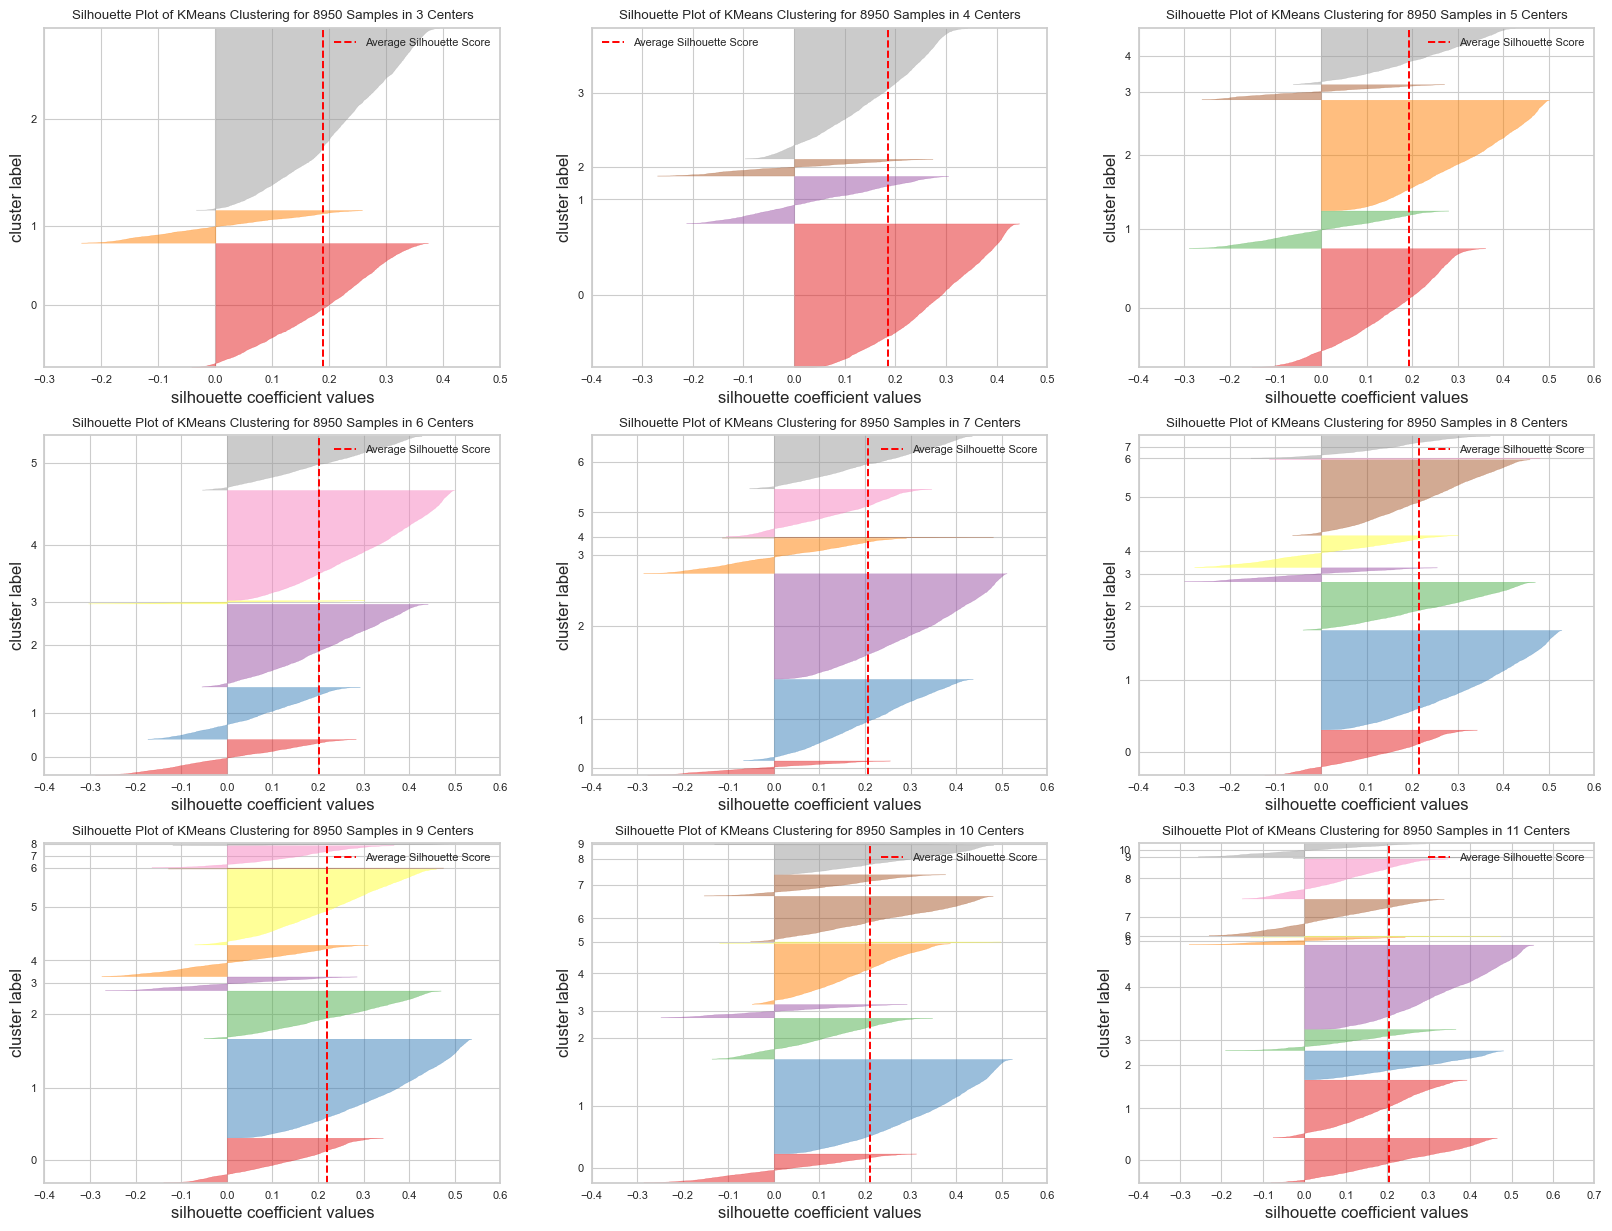

In [39]:
from yellowbrick.cluster import SilhouetteVisualizer
plt.style.use('seaborn-paper')
fig, axs = plt.subplots(3, 3, figsize=(20, 15))
axs = axs.reshape(9)
for i, k in enumerate(range(3, 12)):
    ax = axs[i]
    sil = SilhouetteVisualizer(KMeans(n_clusters = k, n_init = 100, init='k-means++', random_state = 0), ax=ax)
    sil.fit(dimensions)
    sil.finalize()

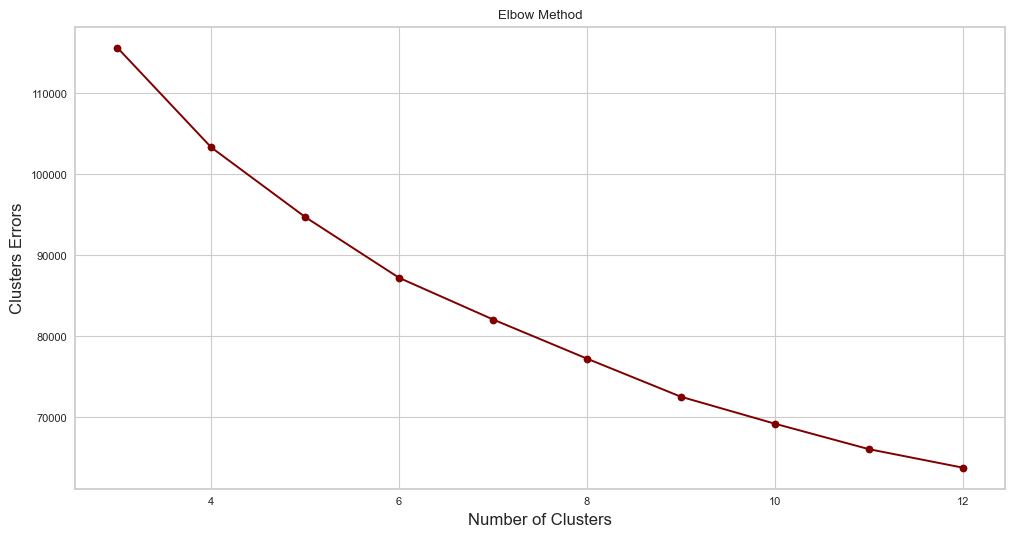

In [40]:
# Elbow Method
# Plotting graph of Elbow Method 

plt.figure(figsize=(12,6))
plt.plot(range(3,13), wcss, c ='#800000', marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('Clusters Errors')
plt.show()

# Inertia or Sum of Squared Errors within the Clusters is also known as the Cluster Errors

# CLuster error will decrease after some Clusters but 

In [ ]:
# Inférence de la méthode  elbow (du coude) :
# La somme des carrés des distances de chaque point de données dans un cluster à partir de son centroïde respectif est appelée inertie.
# Le K auquel l'inertie cesse de chuter de manière significative (en utilisant la méthode du coude ci-dessus) est le meilleur K.

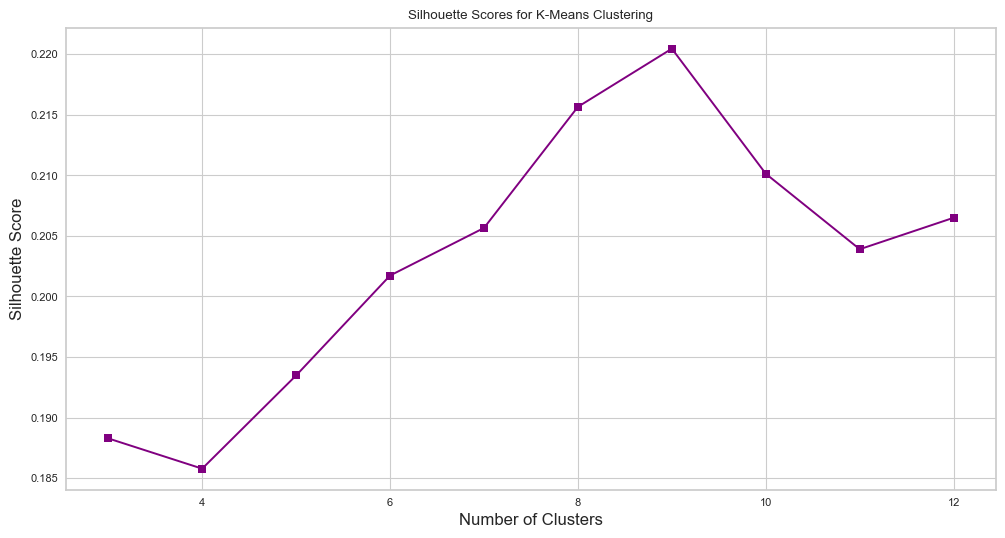

In [41]:
# Plotting the Silhouette Score for the clusters found from K-Means and Agglomerative Clustering

plt.figure(figsize=(12,6))
plt.plot(range(3,13), sil_kmeans, marker='s', c='purple')
plt.title('Silhouette Scores for K-Means Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

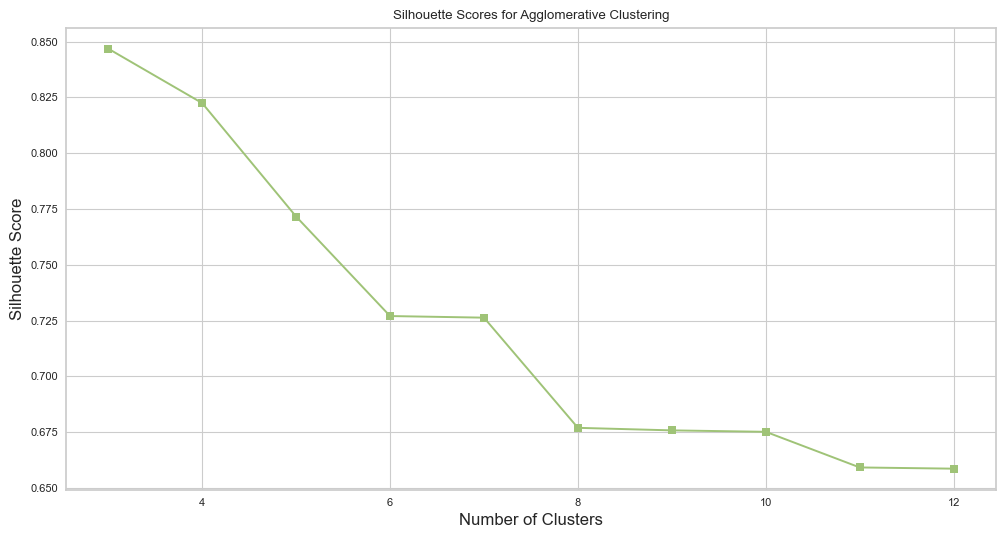

In [42]:
# Plotting the Silhouette Score for the clusters found from K-Means and Agglomerative Clustering

plt.figure(figsize=(12,6))
plt.plot(range(3,13), sil_agc, marker='s', c='g')
plt.title('Silhouette Scores for Agglomerative Clustering')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.show()

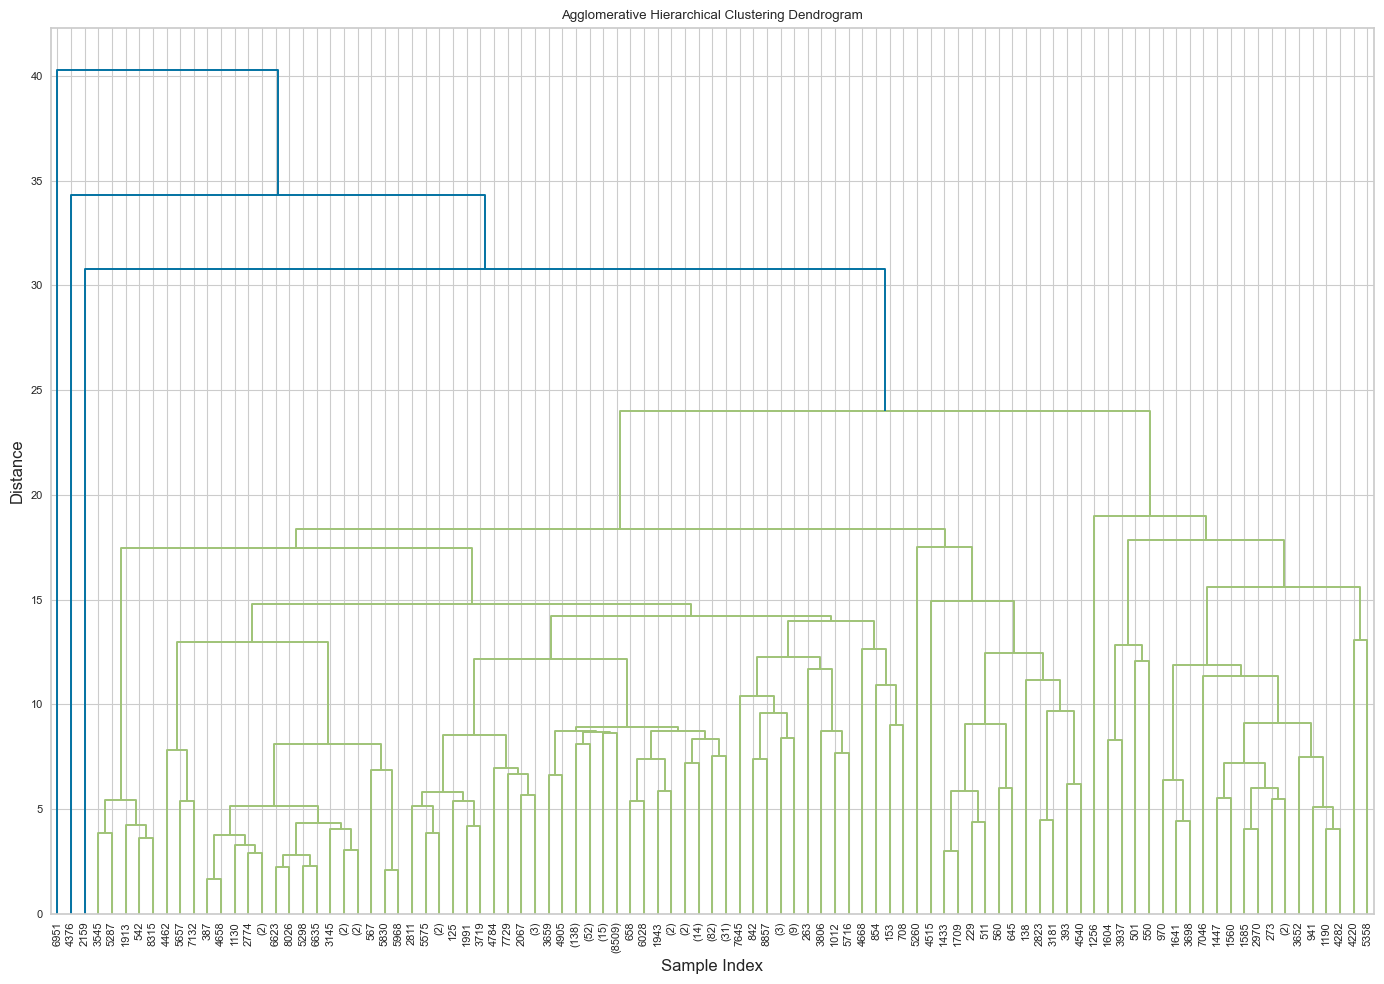

In [43]:
                                     # Dendrogram
# Plotting Dendrogram

Z= linkage(final_df, method = 'average', metric = 'euclidean')
plt.figure(figsize=(14,10))
plt.title('Agglomerative Hierarchical Clustering Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90, leaf_font_size=8, truncate_mode='level', p =12)
plt.tight_layout()
plt.show()

# p-value tells how the deep the Dendrogram goes. The lesser the p value then the values would be far away on the x-axis


In [ ]:
            # Conclusion:
# From the above Elbow method, Silhouette Coefficient Scores for K-Means & Agglomerative Clustering,
# and from Dendrogram, can see that the clusters 5 and 6 look similar.

# We see that the Silhouette Scores for K = 9 is the highest (0.281) 
# and then the Silhouette Coefficient for K = 6 is 0.227, which also gives the nearby score.
# The clusters K = 5 or K = 6 look very similar so now will use the other methods and best practices that is by finding out the Segment Distribution and performing Profiling,
# will check the similarities and dissimilarities between the segments and see which cluster is giving the best sol

In [48]:
kmean= KMeans( n_clusters=6,  n_init=15, max_iter=20 , random_state=44)
kmean.fit(dimensions)
labels=kmean.labels_
kmean.cluster_centers_

array([[-1.07154846e+00, -1.45259864e+00, -1.52846217e+00,
        -8.38755049e-02,  7.88707472e-01,  3.55536072e-01,
         1.31666658e-01, -3.07094808e-01,  6.46370302e-01,
         6.34408918e-02,  2.63380600e-01,  2.95015774e-01,
         5.43828948e-02],
       [ 2.80415187e+00, -1.90255814e-01, -8.09738153e-03,
        -3.41650370e-01, -6.78663042e-01, -6.26315441e-01,
         5.05329035e-01,  5.82402273e-02,  2.84973392e-01,
         1.71374856e-01,  2.45387000e-01, -1.27977960e-01,
         4.57829361e-03],
       [-7.44632934e-01,  3.81693876e+00, -2.90893057e-01,
         1.03853473e+00,  1.35276275e-01, -3.62700645e-01,
         2.31812776e-01,  4.52161516e-02,  1.05078110e-01,
        -2.53377230e-02, -7.24762560e-03,  1.25826205e-01,
         3.30102977e-02],
       [ 1.13909908e+01,  3.46766719e+00, -2.44744848e+00,
        -2.04116219e+00,  8.29375034e-01,  2.94482452e+00,
        -1.76068164e+00, -1.78890707e-01, -5.97465393e-01,
         6.54850317e-01, -5.90078314e

In [49]:
clusters=pd.concat([final_df, pd.DataFrame({'cluster':labels})], axis=1)
clusters.head()

installments  none  one_off   balance  balance_frequency  oneoff_purchases  \
0             1     0        0 -0.731989          -0.249434         -0.356934   
1             0     1        0  0.786961           0.134325         -0.356934   
2             0     0        1  0.447135           0.518084          0.108889   
3             0     0        1  0.049099          -1.016953          0.546189   
4             0     0        1 -0.358775           0.518084         -0.347294   

   installments_purchases  purchases_frequency  oneoff_purchases_frequency  \
0               -0.349079            -0.806490                   -0.678661   
1               -0.454576            -1.221758                   -0.678661   
2               -0.454576             1.269843                    2.673451   
3               -0.454576            -1.014125                   -0.399319   
4               -0.454576            -1.014125                   -0.399319   

   purchases_installments_frequency  ...  purchases_trx  credit_limit  \
0                         -0.707313  ...      -0.511333     -0.960378   
1                         -0.916995  ...      -0.591796      0.688678   
2                         -0.916995  ...      -0.109020      0.826100   
3                         -0.916995  ...      -0.551565      0.826100   
4                         -0.916995  ...      -0.551565     -0.905410   

   payments  minimum_payments  prc_full_payment   tenure  \
0 -0.528979         -0.302400         -0.525551  0.36068   
1  0.818642          0.097500          0.234227  0.36068   
2 -0.383805         -0.093293         -0.525551  0.36068   
3 -0.598688         -0.228307         -0.525551  0.36068   
4 -0.364368         -0.257266         -0.525551  0.36068   

   monthly_avg_purchase  monthly_cash_advance  monthly_usage  cluster  
0             -0.433384             -0.460727      -0.892951        0  
1             -0.477428              2.319396       0.176063        2  
2             -0.120468             -0.460727      -0.144206        1  
3              0.214636             -0.371929      -0.427665        0  
4             -0.470041             -0.460727       0.750693        4  

[5 rows x 22 columns]

In [50]:
# Using PCA to transform data to 2 dimensions for visualization. 
from sklearn.metrics.pairwise import cosine_similarity

dist = 1 - cosine_similarity(dimensions)

pca = PCA(2)
pca.fit(dist)
X_PCA = pca.transform(dist)
x, y = X_PCA[:, 0], X_PCA[:, 1]

In [51]:
X_PCA.shape


(8950, 2)

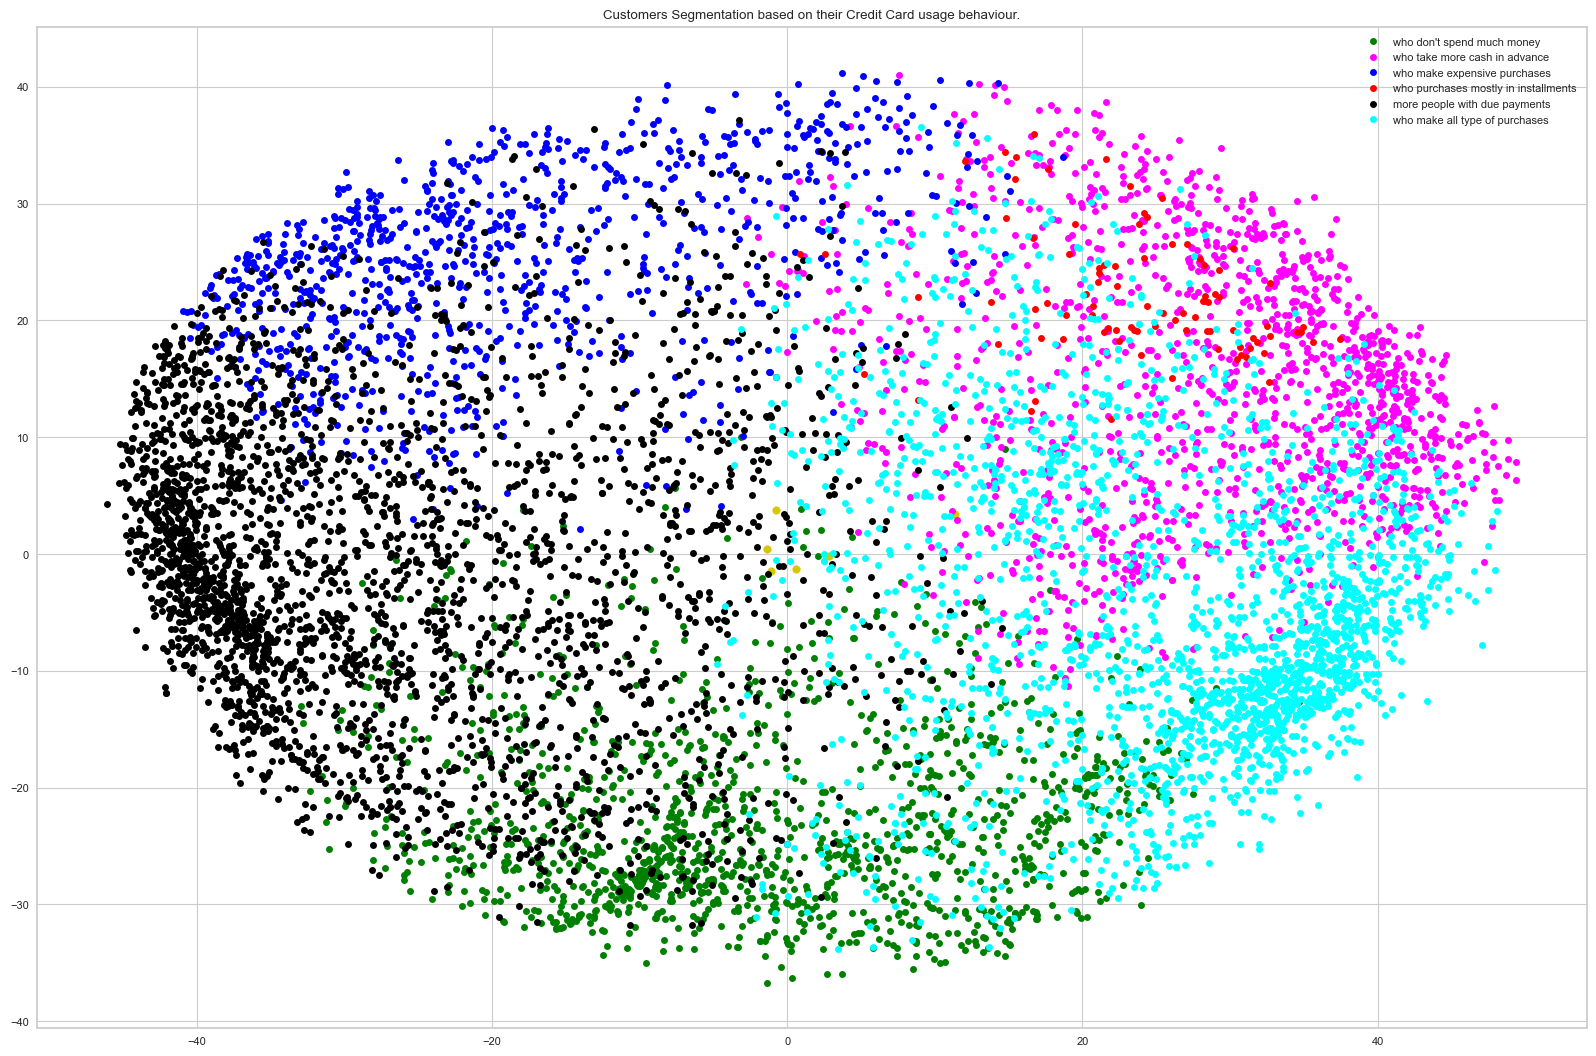

In [52]:


colors = {5: 'cyan',
          4: 'black',
          3: 'red', 
          2: 'blue', 
          1: 'magenta',  
          0:'green'}

names = {5: 'who make all type of purchases', 
         4: 'more people with due payments', 
         3: 'who purchases mostly in installments', 
         2: 'who make expensive purchases',
         1: 'who take more cash in advance',
         0:'who don\'t spend much money'}
  
final_df = pd.DataFrame({'x': x, 'y':y, 'label':labels}) 
groups = final_df.groupby('label')

fig, ax = plt.subplots(figsize=(20, 13)) 

for name, group in groups:
    ax.plot(group.x, group.y, marker='o', linestyle='', ms=5,
            color=colors[name],label=names[name], mec='none')
    ax.set_aspect('auto')
    ax.tick_params(axis='x',which='both',bottom='off',top='off',labelbottom='off')
    ax.tick_params(axis= 'y',which='both',left='off',top='off',labelleft='off')
    
ax.legend()
ax.set_title("Customers Segmentation based on their Credit Card usage behaviour.")
plt.scatter(kmean.cluster_centers_[:, 0], kmean.cluster_centers_[:, 1], c='y')
plt.show()

In [53]:
kmean.inertia_

87236.68518709263